In [2]:
import pandas as pd
import sqlite3

db_con = sqlite3.connect('../checking-logs.sqlite.sqlite')

In [15]:
table = pd.io.sql.read_sql("select timestamp from checker WHERE uid LIKE 'user_%'", db_con, parse_dates='timestamp')
table['date'] = table['timestamp'].dt.date
table['hour'] = table['timestamp'].dt.hour
table['dayofweek'] = table['timestamp'].dt.dayofweek
table

,timestamp,date,hour,dayofweek
0,2020-04-17 05:19:02.744528,2020-04-17,5,4
1,2020-04-17 05:22:35.249331,2020-04-17,5,4
2,2020-04-17 05:22:45.549397,2020-04-17,5,4
3,2020-04-17 05:34:14.691200,2020-04-17,5,4
4,2020-04-17 05:34:24.422370,2020-04-17,5,4
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20,3
3203,2020-05-21 20:22:41.785725,2020-05-21,20,3
3204,2020-05-21 20:22:41.877806,2020-05-21,20,3
3205,2020-05-21 20:37:00.129678,2020-05-21,20,3


In [17]:
table['day'] = table['dayofweek'].apply(lambda x: 'weekend' if x > 4 else 'working_day')
table

,timestamp,date,hour,dayofweek,day
0,2020-04-17 05:19:02.744528,2020-04-17,5,4,working_day
1,2020-04-17 05:22:35.249331,2020-04-17,5,4,working_day
2,2020-04-17 05:22:45.549397,2020-04-17,5,4,working_day
3,2020-04-17 05:34:14.691200,2020-04-17,5,4,working_day
4,2020-04-17 05:34:24.422370,2020-04-17,5,4,working_day
...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20,3,working_day
3203,2020-05-21 20:22:41.785725,2020-05-21,20,3,working_day
3204,2020-05-21 20:22:41.877806,2020-05-21,20,3,working_day
3205,2020-05-21 20:37:00.129678,2020-05-21,20,3,working_day


In [21]:
tab = table.groupby(['day', 'date', 'hour']).count()
table = tab.groupby(['day', 'hour']).mean().reset_index()
table

,day,hour,timestamp,dayofweek
0,weekend,0,2.000000,2.000000
1,weekend,1,6.000000,6.000000
2,weekend,3,1.000000,1.000000
3,weekend,5,2.000000,2.000000
4,weekend,7,4.000000,4.000000
5,weekend,8,7.000000,7.000000
6,weekend,9,3.666667,3.666667
7,weekend,10,7.000000,7.000000
8,weekend,11,23.600000,23.600000
9,weekend,12,9.500000,9.500000


In [22]:
data = pd.pivot(table, values='dayofweek', index='hour', columns='day')
data

day,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,NaN
3,1.000000,2.000000
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000
9,3.666667,6.000000
10,7.000000,13.200000


array([<AxesSubplot:title={'center':'weekend'}, xlabel='hour'>,
       <AxesSubplot:title={'center':'working_day'}, xlabel='hour'>],
      dtype=object)

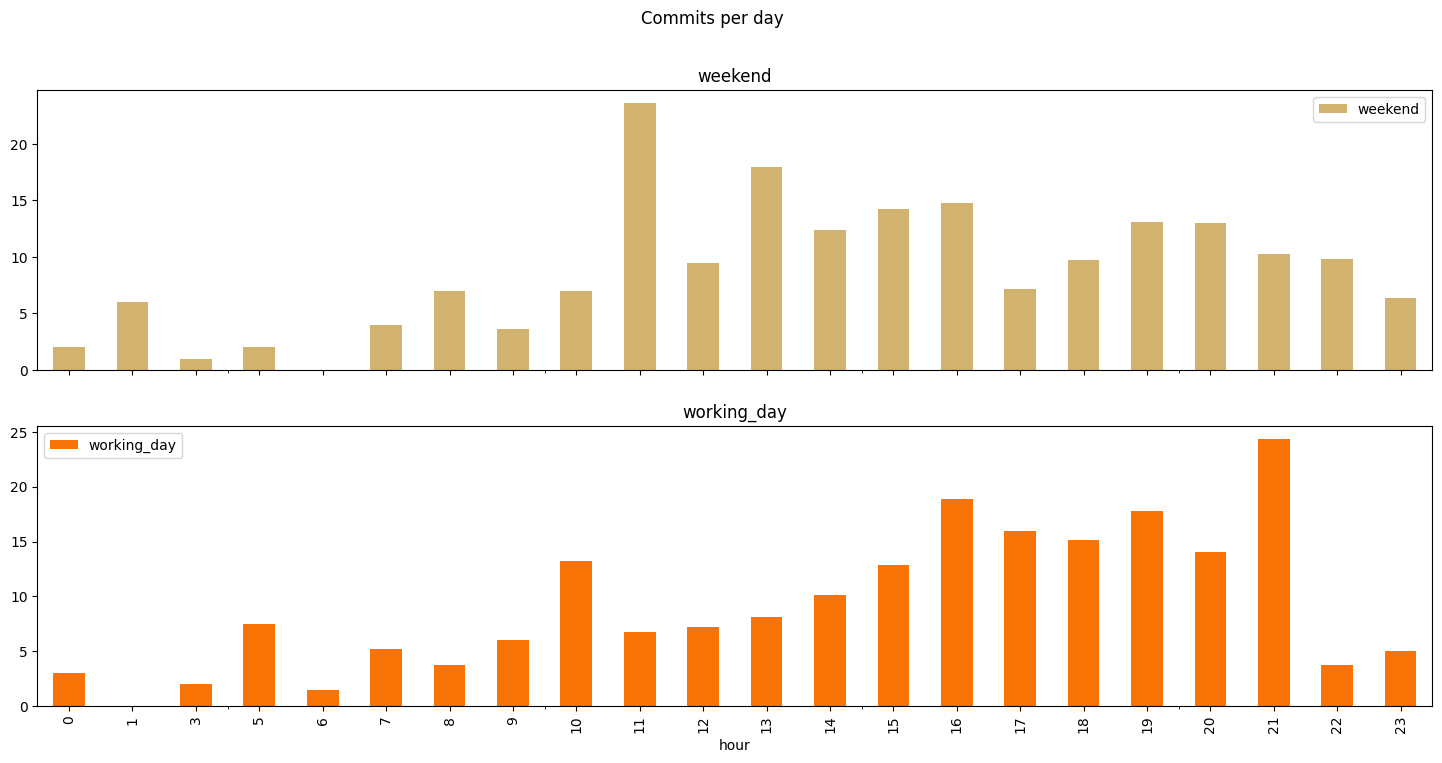

In [26]:
data.plot(kind='bar', subplots=True, fontsize=10, figsize=(18,8),
    title='Commits per day', color=['xkcd:tan', 'xkcd:orange'])